In [1]:
import define_transformations_afolu as dta
import define_transformations_circular_economy as dtc
import define_transformations_energy as dte
import define_transformations_ippu as dti

import os, os.path
import numpy as np
import pandas as pd
#from model_attributes import *
import model_attributes as ma
from attribute_table import AttributeTable
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_electricity as ml
import model_energy as me
import model_socioeconomic as se
from model_socioeconomic import Socioeconomic
import setup_analysis as sa
import sisepuede_models as sm
import support_classes as sc
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
from typing import Union
import inspect
import ingestion as ing
import logging
from sisepuede_file_structure import *
import transformations_base_afolu as tba
import transformations_base_circular_economy as tbc
import transformations_base_energy as tbe
import transformations_base_general as tbg
import transformations_base_ippu as tbi


importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)
importlib.reload(mc)
importlib.reload(mi)
importlib.reload(me)
importlib.reload(se)
importlib.reload(tbc)
importlib.reload(tbe)


import sisepuede as ssp
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede_transformations_energy.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2431: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2236: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for desig, df in df_by_designation:
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2431: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warni

<Logger __main__ (DEBUG)>

In [ ]:
all_vars = sorted(list(df_test["variable"].unique()))
fields = [x for x in all_vars if "_fgtv_" in x]

df_test[
    df_test["time_period"].isin([35])
    & df_test["primary_id"].isin([0, 11011])
    & df_test["variable"].isin(fields)
]


In [3]:

df_test = pd.read_csv("/Users/jsyme/Downloads/summary_energy_results_original.csv")

In [34]:
all_vars = sorted(list(df_test["variable"].unique()))
fields = [x for x in all_vars if "emission_co2e_co2_entc_processing_and_refinement_fp_hydrogen_gasification" in x]

df_test[
    df_test["time_period"].isin(range(10, 36))
    & df_test["primary_id"].isin([71071])
    & df_test["variable"].isin(fields)
]


,primary_id,region,time_period,variable,value
756406,71071,montenegro,10,emission_co2e_co2_entc_processing_and_refineme...,0.094201
756407,71071,montenegro,11,emission_co2e_co2_entc_processing_and_refineme...,0.539248
756408,71071,montenegro,12,emission_co2e_co2_entc_processing_and_refineme...,0.938222
756409,71071,montenegro,13,emission_co2e_co2_entc_processing_and_refineme...,1.288860
756410,71071,montenegro,14,emission_co2e_co2_entc_processing_and_refineme...,1.589527
756411,71071,montenegro,15,emission_co2e_co2_entc_processing_and_refineme...,1.839264
756412,71071,montenegro,16,emission_co2e_co2_entc_processing_and_refineme...,2.039939
756413,71071,montenegro,17,emission_co2e_co2_entc_processing_and_refineme...,2.189998
756414,71071,montenegro,18,emission_co2e_co2_entc_processing_and_refineme...,2.290334
756415,71071,montenegro,19,emission_co2e_co2_entc_processing_and_refineme...,2.342517


In [11]:
300*365

109500

In [2]:

##########################
#   LOAD INPUT TABLES    #
##########################

warnings.filterwarnings("ignore")
importlib.reload(ml)
importlib.reload(me)


regions = sc.Regions(sa.model_attributes)
time_periods = sc.TimePeriods(sa.model_attributes)

##  setup location of calibrated files by sector

df_fake_data = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))
dir_calibs = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo"

# setup output templates 
dir_template_inputs = os.path.join(dir_calibs, "template_inputs")
os.makedirs(dir_template_inputs, exist_ok = True) if not os.path.exists(dir_template_inputs) else None
dict_template_file_paths = {}

dict_calibration_file_paths = {
    "af": os.path.join(dir_calibs, "af", "data_complete_future_2022_09_30_test_updated.csv"),
    "ce": os.path.join(dir_calibs, "ce", "data_complete_future_2022_12_13_test.csv"),
    "en": os.path.join(dir_calibs, "en", "data_complete_future_2023_02_24.csv"),#"data_complete_future_2022_12_09_test.csv"),
    "ip": os.path.join(dir_calibs, "ip", "data_ippu_2023_01_16_fixed_cleaned.csv"),
    # use most recent for socioeconomic
    "se": os.path.join(dir_calibs, "en", "data_complete_future_2023_02_24.csv")
}

# TEMP FOR INDIA
running_out_of_lac = False
if running_out_of_lac:
    print("READING NON-STANDARD DATA")
    for key in dict_calibration_file_paths.keys():
        dict_calibration_file_paths.update({key: os.path.join(dir_calibs, "all", "Data_Input_2023_05_12_MNE.csv")})

"""
dict_calibration_file_paths = {
    "af": os.path.join(dir_calibs, "all", "datos_calibrados_20230221.csv"),
    "ce": os.path.join(dir_calibs, "all", "datos_calibrados_20230221.csv"),
    "en": os.path.join(dir_calibs, "all", "datos_calibrados_20230221.csv"),#"data_complete_future_2022_12_09_test.csv"),
    "ip": os.path.join(dir_calibs, "all", "datos_calibrados_20230221.csv"),
    # use most recent for socioeconomic
    "se": os.path.join(dir_calibs, "all", "datos_calibrados_20230221.csv")
}
""";


# initialize 
all_regions = None
dict_isos = {}
dict_calibration_tables = {}
dict_replace_iso = sa.model_attributes.dict_attributes.get("region").field_maps.get("iso_alpha_3_to_region")
dict_sets = {}
field_country = "country"
field_iso = "iso_code3"
field_region = "nation"
field_year = "year"
fields_drop = [field_iso, field_region, field_year] # only apply later
field_time_period = sa.model_attributes.dim_time_period

# get some attributes
attr_region = sa.model_attributes.dict_attributes.get("region")
attr_sector = sa.model_attributes.dict_attributes.get("abbreviation_sector")
attr_strat = sa.model_attributes.dict_attributes.get(f"dim_{sa.model_attributes.dim_strategy_id}")
attr_time_period = sa.model_attributes.dict_attributes.get(f"dim_{sa.model_attributes.dim_time_period}")

# dictionary and attribute derivaties
dict_strat_to_strat_id = attr_strat.field_maps.get("strategy_to_strategy_id")
dict_repl_time_period = attr_time_period.field_maps.get(f"year_to_{sa.model_attributes.dim_time_period}")
strat_base = int(attr_strat.table[attr_strat.table["baseline_strategy_id"] == 1][attr_strat.key])
# map each country to ISO code 3 and each code to 
dict_country_to_iso = dict((k, v.upper()) for k, v in attr_region.field_maps.get(f"{attr_region.key}_to_iso_alpha_3").items())
dict_iso_to_country = sf.reverse_dict(dict_country_to_iso)
all_iso = list(dict_iso_to_country.keys())

# some time period oriented tools
dict_year_to_time_period = attr_time_period.field_maps.get(f"year_to_{attr_time_period.key}")
def year_to_tp(
    year: int
) -> int:

    m = min((dict_year_to_time_period.keys()))
    m_v = dict_year_to_time_period.get(m)

    diff = m - m_v

    return dict_year_to_time_period.get(year, year - diff)

# initialize relevant models
model_afolu = mafl.AFOLU(sa.model_attributes)
model_energy = me.NonElectricEnergy(sa.model_attributes)
model_elec = ml.ElectricEnergy(
    sa.model_attributes, 
    sa.dir_jl,
    sa.dir_ref_nemo,
    initialize_julia = False
)



#
#    SOME FUNCTIONS    #
#

# function to verify time periods
def check_time_periods(
    df_in: pd.DataFrame,
    attribute_time_period: AttributeTable,
    fields_group_by: List[str]
) -> pd.DataFrame:
    """
    Check a data frame to ensure that a record exists for each time period
        for the grouping specified in fields_group_by
    """
    
    # check fields
    fields_group_by = [x for x in fields_group_by if x in df_in.columns]
    if len(fields_group_by) == 0:
        return None
    
    field_time_period = attribute_time_period.key
    
    dfs = df_in.groupby(fields_group_by)
    df_out = []
    for df in dfs:
        i, df = df
        
        tps = sorted(list(df[field_time_period]))
        tps_set = sorted(list(set(tps)))
        if (tps == tps_set) & (set(tps) == set(attribute_time_period.key_values)):
            df_out.append(df) 
    
    return pd.concat(df_out, axis = 0).reset_index(drop = True)



def scale_vars(
    df_in: pd.DataFrame,
    dict_scale: Dict[str, float],
    model_attributes: ModelAttributes
) -> pd.DataFrame:
    """
    Scale model variables k in a data frame according to 
        dict_scale = {k: scalar}
    """
    
    df_out = df_in.copy()
    for modvar in dict_scale.keys():
        subsec = model_attributes.get_variable_subsector(modvar)
        fields = model_attributes.build_varlist(
            subsec,
            modvar
        ) if (subsec is not None) else None
        
        if fields is not None:
            df_out[fields] *= dict_scale.get(modvar)
        
    return df_out



# set up the MSP Max Prod growth rate for hydropower--basically, stop it 
def transformation_change_msp_max(
    df_input: pd.DataFrame,
    dict_cat_to_vector: Dict[str, float],
    model_attributes: ma.ModelAttributes,
    model_electricity: ml.ElectricEnergy,
    drop_flag: Union[int, float, None] = None,
    model_energy: Union[me.NonElectricEnergy, None] = None,
    **kwargs
) -> pd.DataFrame:
    """ 
    Modify the maximum growth in production by electricity generation technology
        in serve of MinShareProduction specifications. Used to prevent a
        technology's estimated production from growing (or to place a cap on 
        growth in production) after the last zero-valued time-period
        associated with `vec_ramp`. 
    
    For exampmle, can be used to prevent hydropoower prodction fom increasing 
        after a given time period (based on `vec_ramp`).

    Function Arguments
    ------------------
    - df_input: input data frame containing baseline trajectories
    - dict_cat_to_vector: dictionary mapping a technology category to two an 
        input vector. The vector uses a drop flag to (generally -999) to identify
        time periods that are not subject to an MSP Max Prod; other values greater
        than 0 are used to identify the maximum deviation from the *last time 
        period with a non-drop flag*, entered as a proportion.
    - model_attributes: ModelAttributes object used to call strategies/variables
    - model_electricity: Electricity and Fuel Production model used to call 
        variables
    - vec_ramp: ramp vec used for implementation

    Keyword Arguments
    -----------------
    - drop_flag: value in 
        model_electricity.modvar_entc_max_elec_prod_increase_for_msp used to 
        signal the presence of no constraint. Defaults to 
        model_electricity.drop_flag_tech_capacities if None
    - field_region: field in df_input that specifies the region
    - regions_apply: optional set of regions to use to define strategy. If None,
        applies to all regions.
    - strategy_id: optional specification of strategy id to add to output
        dataframe (only added if integer)
    """
    
    drop_flag = model_electricity.drop_flag_tech_capacities if not sf.isnumber(drop_flag) else drop_flag
    
    # check for variables and initialize fields_check as drops
    df_out = df_input.copy()
    fields_check = model_attributes.build_varlist(None, model_electricity.modvar_entc_max_elec_prod_increase_for_msp)
    df_out[fields_check] = drop_flag
    
    for cat, vec in dict_cat_to_vector.items():
        
        dict_trans = {
            model_elec.modvar_entc_max_elec_prod_increase_for_msp: {
                "bounds": (drop_flag, np.inf),
                "categories": [cat],
                "magnitude": vec,
                "magnitude_type": "vector_specification",
                "vec_ramp": vec
            }
        }
        
        # call general transformation
        df_out = tbe.transformation_general(
            df_out,
            model_attributes,
            dict_trans,
            model_energy = model_electricity.model_energy,
            **kwargs
        )

        
    return df_out







########################
###                  ###
###    BEGIN TEMP    ###
###                  ###
########################

###
###    TEMPORARY: OVERWRITE CAPACITIES WITH EARLIER DATA
###

df_residual_capacity_overwrite = pd.read_csv(sa.fp_csv_nemomod_residual_capacity_inputs)
df_residual_capacity_overwrite = df_residual_capacity_overwrite[
    df_residual_capacity_overwrite["year"].isin(dict_repl_time_period.keys())
]

dict_replace_iso_rev = sf.reverse_dict(dict_replace_iso)
dict_replace_iso_rev = dict((k, v.upper()) for k, v in dict_replace_iso_rev.items())
df_residual_capacity_overwrite["year"].replace(dict_repl_time_period, inplace = True)

df_residual_capacity_overwrite.drop([attr_region.key], axis = 1, inplace = True)
df_residual_capacity_overwrite.rename(columns = {
    "year": sa.model_attributes.dim_time_period,
    "iso_alpha_3": field_iso
}, inplace = True)


###
###  TEMPORARY: OVERWRITE AFOLU CLIMATE DATA AND SOC
###

# KCC
df_kcc = pd.read_csv(sa.fp_csv_climate_fields_by_country_simple)
df_kcc.rename(
    columns = {regions.field_iso: field_iso}, 
    inplace = True
)
#df_kcc[field_iso] = df_kcc[field_country].replace(dict_country_to_iso)
#df_kcc.drop([field_country], axis = 1, inplace = True)

# SOC
df_soc = pd.read_csv(sa.fp_csv_soc_fields_by_country_simple)
df_soc.rename(
    columns = {regions.field_iso: field_iso}, 
    inplace = True
)

#df_soc[field_iso] = df_soc[field_country].replace(dict_country_to_iso)
#df_soc.drop([field_country], axis = 1, inplace = True)

df_climate = pd.merge(df_kcc, df_soc, how = "inner")


###
###  TEMPORARY: OVERWRITE SOME MORE ENERGY DATA
###

fp_data_overwrite = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo/en/data_complete_future_2023_05_12.csv"
df_overwrite = pd.read_csv(fp_data_overwrite)
# fill in Infs
df_overwrite.replace([np.inf, -np.inf], 0.0, inplace = True)

fields_drop = [x for x in df_overwrite.columns if ("gas_furnace" in x) or ("gas_petroleum_liquid" in x)]
fields_drop += [x for x in df_overwrite.columns if ("residual_capacity" in x)]
fields_drop += [x for x in ["nemomod_entc_total_annual_max_capacity_pp_hydropower_gw"] if x in df_overwrite.columns]
fields_drop_ow = [x for x in df_overwrite.columns if ("variable_cost" in x) and ("per_gw" in x)]

df_overwrite = time_periods.years_to_tps(
    df_overwrite,
    field_year = "Year"
)
df_overwrite[sa.model_attributes.dim_time_period] = df_overwrite["Year"].apply(year_to_tp)
df_overwrite.drop(fields_drop, axis = 1, inplace = True) if (len(fields_drop) > 0) else None

# merge/interpolate to deal with any missing years
df_all_rows = sf.explode_merge(
    attr_time_period.table[[attr_time_period.key]].drop_duplicates(),
    df_overwrite[[field_iso]].drop_duplicates()
)
df_overwrite = pd.merge(
    df_all_rows, 
    df_overwrite, 
    how = "left"
).interpolate().drop(["Year", "Nation"], axis = 1).sort_values(by = [field_iso, attr_time_period.key]).reset_index(drop = True)
"""
# TEMPORARY: FIX MINOR DEVIATIONS IN SUM
if fp_data_overwrite == "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo/en/data_complete_future_2023_04_08.csv":
    
    flds_overwrite = [
        "frac_trns_fuelmix_road_heavy_regional_hydrocarbon_gas_liquids",
        "frac_trns_fuelmix_road_light_hydrocarbon_gas_liquids"
    ]
    
    for fld in flds_overwrite:
        df_overwrite[fld] = 0.0
        
    print(f"overwriting from file {fp_data_overwrite}: scaling `frac_trns_fuelmix_road_heavy_regional_$CAT-FUEL$` to rebalance minor deviations from 1...")
    vl = [
        "frac_trns_fuelmix_road_heavy_regional_biofuels",
        "frac_trns_fuelmix_road_heavy_regional_diesel",
        "frac_trns_fuelmix_road_heavy_regional_electricity",
        "frac_trns_fuelmix_road_heavy_regional_gasoline",
        "frac_trns_fuelmix_road_heavy_regional_hydrocarbon_gas_liquids",
        "frac_trns_fuelmix_road_heavy_regional_hydrogen",
        "frac_trns_fuelmix_road_heavy_regional_natural_gas"
    ]
    
    vec_tot = np.array(df_overwrite[vl]).sum(axis = 1)
    
    for field in vl:
        df_overwrite[field] = np.array(df_overwrite[field])/vec_tot
        
        
    print(f"overwriting from file {fp_data_overwrite}: scaling `frac_trns_fuelmix_road_light_$CAT-FUEL$` to rebalance minor deviations from 1...")
    vl = [
        "frac_trns_fuelmix_road_light_biofuels",
        "frac_trns_fuelmix_road_light_diesel",
        "frac_trns_fuelmix_road_light_electricity",
        "frac_trns_fuelmix_road_light_gasoline",
        "frac_trns_fuelmix_road_light_hydrocarbon_gas_liquids",
        "frac_trns_fuelmix_road_light_hydrogen"
    ]
    
    vec_tot = np.array(df_overwrite[vl]).sum(axis = 1)
    
    for field in vl:
        df_overwrite[field] = np.array(df_overwrite[field])/vec_tot
""";
        


###
###    TEMPORARY: OVERWRITE INITIAL PRODUCTION
###

df_prodvalues = pd.read_csv("/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/ippu/ProductionValues_2023_02_17.csv")
field_tp = sa.model_attributes.dim_time_period
df_tp = sa.model_attributes.dict_attributes.get(f"dim_{field_tp}").table[[field_tp]]
df_prodvalues = sf.explode_merge(df_prodvalues, df_tp) if (field_tp not in df_prodvalues.columns) else df_prodvalues
df_prodvalues["nation"].replace(dict_replace_iso_rev, inplace = True)
df_prodvalues.rename(
    columns = {
        "nation": field_iso
    }, 
    inplace = True
)


###
###    TEMPORARY: OVERWRITE SELECT EFFICIENCY FACTORS REPRESENTING IMPROVEMENTS IN ELECTRIFYING HEAT ENERGY TO 
###

fields_overwrite = sa.model_attributes.build_varlist(
    sa.model_attributes.subsec_name_enfu,
    "Average Industrial Energy Fuel Efficiency Factor",
    restrict_to_category_values = ["fuel_electricity"]
) + sa.model_attributes.build_varlist(
    sa.model_attributes.subsec_name_scoe,
    "SCOE Efficiency Factor for Heat Energy from Electricity"
)
df_effic_factors = df_fake_data[[field_time_period] + fields_overwrite]



###
###    TEMPORARY: CAP MAX TECH CAPACITY FOR HYDROPOWER
###

df_hydro_cap_synthetic = pd.read_csv(sa.fp_csv_nemomod_hydropower_max_tech_capacity)



###
###    TEMPORARY: READ IN MinShareProduction BASELINE VALUES
###


df_min_share_production = pd.read_csv(
    sa.fp_csv_nemomod_minimum_share_of_production_baselines
).drop(["year"], axis = 1)

if False:
    # temporary modification - try cutting the MSP in hal for the first 6 years (while capping new investments)
    df_min_share_production.loc[
        [x < 6 for x in list(df_min_share_production[sa.model_attributes.dim_time_period])], 
        [x for x in df_min_share_production.columns if "nemomod" in x]
    ] = df_min_share_production.loc[
        [x < 6 for x in list(df_min_share_production[sa.model_attributes.dim_time_period])], 
        [x for x in df_min_share_production.columns if "nemomod" in x]
    ] * 0.0
    
def rescale_msps(
    df_msp: pd.DataFrame,
    field_time_period: str = sa.model_attributes.dim_time_period,
    min_total: Union[float, None] = 1.0,
    time_periods_apply: Union[List[int], None] = None
) -> pd.DataFrame:
    """
    Rescale minimum shares of production to meet a minimum total
    
    Function Arguments
    ------------------
    - df_msp: data frame containing variables associatedion with
        model_elec.modvar_entc_nemomod_min_share_production that are 
        to be rescaled (potentially) to meet a minimum total
    
    Keyword Arguments
    -----------------
    - field_time_period: field containing the time period
    - min_total: minimum total for minimum shares of production
    - time_periods_apply: time periods to apply minimum to 
    """
    
    if min_total is None:
        return df_msp
    
    # get time periods that are to be rescaled
    time_periods_apply = (
        list(df_msp[field_time_period].unique()) 
        if (time_periods_apply is None)
        else time_periods_apply
    )
    
    
    # variables to rescale
    vars_rescale = sa.model_attributes.build_varlist(
        None,
        model_elec.modvar_entc_nemomod_min_share_production
    )
    vars_rescale = [x for x in df_msp.columns if x in vars_rescale]

    # split off appropriate years
    df_rescale = df_msp[df_msp[field_time_period].isin(time_periods_apply)].copy().reset_index(drop = True)
    df_ignore = df_msp[~df_msp[field_time_period].isin(time_periods_apply)].copy().reset_index(drop = True)
    
    # get totals and finally rescale
    vec_total = np.array(df_rescale[vars_rescale].sum(axis = 1))
    vec_min = min_total*np.ones(len(df_rescale))
    vec_scale = sf.vec_bounds(vec_min/vec_total, (1, np.inf))
    df_rescale[vars_rescale] = sf.do_array_mult(np.array(df_rescale[vars_rescale]), vec_scale)
    
    
    df_msp = (
        pd.concat([df_rescale, df_ignore], axis = 0)
        .sort_values(by = [field_iso, field_time_period])
        .reset_index(drop = True)
    )
    
    
    return df_msp, vars_rescale

# RESCALE MSP AT EARLY TIME PERIODS TO BE MORE SIGNFICANT (TEMPORARY SOLUTION 04-21-23--REAL SOLUTION SHOULD INCLUDE BETTER RESIDUAL CAPACITY/CAPACITY FACTORS)
df_min_share_production, vars_rescale = rescale_msps(df_min_share_production, time_periods_apply = list(range(6)))
    


###
###    TEMPORARY: READ IN TRANSMISSION LOSSES BY COUNTRY
###

df_transmission_losses = pd.read_csv(
    sa.fp_csv_nemomod_transmission_losses
).drop(["year"], axis = 1)
df_transmission_losses = df_transmission_losses[
    df_transmission_losses[attr_time_period.key].isin(attr_time_period.key_values)
].reset_index(drop = True)



###
###    TEMPORARY: READ IN FUEL COSTS
###

df_fuel_costs = pd.read_csv(sa.fp_csv_nemomod_fuel_costs)



###
###    TEMPORARY: GET TECHNOLOGY MAX CAPACITY INVESTMENTS
###

fields_overwrite = sa.model_attributes.build_varlist(
    sa.model_attributes.subsec_name_entc,
    model_elec.modvar_entc_nemomod_total_annual_max_capacity_investment
)
df_max_cap = df_fake_data[[field_time_period] + fields_overwrite]



###
###  TEMPORARY OVERWRITE OF WOOD FUEL FRACTIONS FROM RECYCLED WOOD 
###


modvars_frac = model_energy.modvars_inen_list_fuel_fraction
dict_cp_wood = {}

# set cateogories
attr_ind = sa.model_attributes.dict_attributes.get("cat_industry")
dict_ind_to_recycling_target = attr_ind.field_maps.get("cat_industry_to_target_cat_industry_to_adjust_with_recycling")

# get target category (wood) and source from recycling
cat_target = model_afolu.cat_ippu_wood
cat_source = None
for k in dict_ind_to_recycling_target.keys():
    cat_source = k if (dict_ind_to_recycling_target.get(k) == f"``{cat_target}``") else cat_source


if cat_source is not None:
    for modvar in modvars_frac:

        cats = sa.model_attributes.get_variable_categories(modvar)
        subsec = sa.model_attributes.get_variable_subsector(modvar)
        
        if (cat_source in cats) and (cat_target in cats):

            field_source = sa.model_attributes.build_varlist(
                subsec,
                modvar,
                restrict_to_category_values = [cat_source]
            )[0]

            field_target = sa.model_attributes.build_varlist(
                subsec,
                modvar,
                restrict_to_category_values = [cat_target]
            )[0]

            dict_cp_wood.update({field_source: field_target})

            
###
###   TEMP: DEFINE FUNCTION TO ADD BIOFUELS (BIOMASS) TO MANUFACTURING INDUSTRIES (excl electronics, cement, metals, glass, lime_and_carbonites)
###
###   04-21-2023
###

cats_inen_with_biofuels = [
    "chemicals",
    "other_industries",
    "other_product_manufacturing",
    "paper",
    "plastic",
    "textiles",
    "wood"
]


def modify_input_inen_fracs(
    df_energy_trajectories_in: pd.DataFrame,
    dict_fuel_info: Dict,
    cats_to_apply: Union[List[str], None] = None,
    field_time_period: str = sa.model_attributes.dim_time_period,
    regions: Union[List, None] = None
) -> pd.DataFrame:
    """
    Rescale minimum shares of production to meet a minimum total.
    
    Assumes targets in dict_fuel_info have total of 0.
    
    
    Function Arguments
    ------------------
    - df_energy_trajectories: data frame containing INEN fractions
        to be modified
    - dict_fuel_info: dictionary mapping fuel to two keys:
        * "target": target fraction to apply to all time periods
        * "cats": catgories to apply to
    - regions: regions to apply to
    """
    # some initialization
    df_energy_trajectories = df_energy_trajectories_in.copy()
    attr_enfu = sa.model_attributes.dict_attributes.get("cat_fuel")
    attr_ind = sa.model_attributes.dict_attributes.get("cat_industry")
    cats = attr_ind.key_values if (cats_to_apply is None) else cats_to_apply
    
    # get target total
    targ_total = [v for k, v in dict_fuel_info.items() if k in attr_enfu.key_values]
    targ_total = float(sf.vec_bounds(sum(targ_total), (0, 1)))
    scalar_existing = 1 - targ_total
    
    dict_inen_fracs = model_energy.dict_inen_fuel_categories_to_fuel_variables
    regions = (
        sorted(list(df_energy_trajectories[field_iso].unique()))
        if regions is None
        else regions
    )
    df_grouped_by_region = df_energy_trajectories.groupby([field_iso])
    
    df_out = []
    
    for region, df in df_grouped_by_region:
        
        if region in regions:
            for fuel in dict_inen_fracs.keys():
                
                dict_vars_cur = dict_inen_fracs.get(fuel)    
                dict_fuel_info_cur = dict_fuel_info.get(fuel)
                
                modvar = dict_vars_cur.get("fuel_fraction")
                
                # get categories, check against spcificationin Model Attributes, then convert to fields
                cats_fields = sa.model_attributes.get_variable_categories(modvar)
                cats_fields = (
                    [x for x in cats if x in cats_fields]
                    if cats_fields is not None
                    else None
                )
                fields = sa.model_attributes.build_varlist(
                    None,
                    modvar,
                    restrict_to_category_values = cats_fields
                )
                
                # only adjust fields that are present
                fields_adj = [x for x in fields if x in df.columns]
                df[fields_adj] = (
                    np.array(df[fields_adj])*scalar_existing
                    if fuel not in dict_fuel_info.keys()
                    else dict_fuel_info.get(fuel)
                )
            
        df_out.append(df)
        
    df_out = (
        pd.concat(df_out, axis = 0)
        .sort_values(by = [field_iso, field_time_period])
        .reset_index(drop = True)
    )
        
      
    return df_out



###
###    TEMP: ADD IN SCOE ELASTS -- MOVE TO BUILD TRANSFORMATIONS FILE FUNCTION/PROCESS
###


def get_energy_data(
) -> pd.DataFrame:
    fps_read = [
        # Elasticity of SCOE energy consumption to GDP/Capita
        sa.fp_csv_scoe_elasticity_of_energy_consumption,
        # SCOE Energy Consumption Scalar
        sa.fp_csv_scoe_consumption_scalar,
        # Initial SCOE Energy consumption
        sa.fp_csv_scoe_initial_energy_consumption,
    ]
    
    df_out = None
    
    
    for fp in fps_read:
        
        df_tmp = pd.read_csv(fp)
        
        df_out = (
            df_tmp
            if df_out is None
            else pd.merge(df_out, df_tmp, how = "inner")
        )

    df_out = time_periods.years_to_tps(
        df_out,
        field_year = field_year
    )

    
    return df_out


def get_ippu_data(
) -> pd.DataFrame:
    fps_read = [
        # Elasticity of industrial production to GDP
        sa.fp_csv_elasticity_of_industrial_production,
        # Flourinated Compound emission factors
        sa.fp_csv_ippu_fc_efs,
        # Fraction of cement from clinker
        sa.fp_csv_ippu_frac_cement_clinker,
        # Industrial Production Scalar
        sa.fp_csv_industrial_production_scalar,
        # Initial Industrial production
        sa.fp_csv_initial_industrial_production,
        # Net Imports clinker
        sa.fp_csv_ippu_net_imports_cement_clinker,
        
    ]
    
    df_out = None
    
    
    for fp in fps_read:
        
        df_tmp = pd.read_csv(fp)
        
        df_out = (
            df_tmp
            if df_out is None
            else pd.merge(df_out, df_tmp, how = "inner")
        )

    df_out = time_periods.years_to_tps(
        df_out,
        field_year = field_year
    )

    
    return df_out


df_ener_overwrites = get_energy_data()
df_ippu_overwrites = get_ippu_data()







######################
###                ###
###    END TEMP    ###
###                ###
######################

if True:
    # load in tables and make some quick modifications
    for k in dict_calibration_file_paths.keys():
        
        # read and clean columns
        df_read = pd.read_csv(dict_calibration_file_paths.get(k))
        dict_rnm = dict((x, x.lower()) for x in df_read.columns if x != x.lower())
        df_read.rename(columns = dict_rnm, inplace = True)
        
        # drop ISOs that are undefiuned
        df_read = df_read[df_read[field_iso].isin(all_iso)].reset_index(drop = True)
        # add time period if not present
        if attr_time_period.key not in df_read.columns:
            df_read[attr_time_period.key] = df_read[field_year].apply(time_periods.year_to_tp)
        
        
        ###
        ###  TEMPORARY: DROP OLD FUELS
        ###
        if True:
            fields_drop = [x for x in df_read.columns if ("gas_furnace" in x) or ("gas_petroleum_liquid" in x)]
            df_read.drop(fields_drop, axis = 1, inplace = True) if (len(fields_drop) > 0) else None
        
        
        ###
        ###  TEMPORARY: OVERWRITE AFOLU CLIMATE DATA
        ###
        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_climate,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
        
        
        ###
        ###    TEMPORARY: OVERWRITE OTHER KEY ENERGY DATA
        ###
        if True and not running_out_of_lac:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_overwrite,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
  
            
        
           
        ###
        ###    TEMPORARY: OVERWRITE FUEL COSTS
        ###
        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_fuel_costs,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
            
            
        
        ###
        ###    TEMPORARY: OVERWRITE MAX CAPACITY
        ###
        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_max_cap,
                fields_index = [sa.model_attributes.dim_time_period],
                overwrite_only = False
            )
            
            
        
            
            
        ###
        ###    TEMPORARY: RENAME FROM CALIBRATED FILE
        ###
        
        if False:
            dict_repl = {
                "gas_petroleum_liquid": "hydrocarbon_gas_liquids",
                "gas_furnace": "furnace_gas"
            }

            dict_rnm = {}

            for substr in dict_repl.keys():
                dict_rnm_cur = dict(
                    (x, x.replace(substr, dict_repl.get(substr))) 
                    for x in df_read.columns if substr in x
                )

                dict_rnm.update(dict_rnm_cur)

            df_read.rename(columns = dict_rnm, inplace = True)

        
        ####
        ####   TEMPORARY OVERWRITE OF RESIDUAL CAPACITY
        ####

        print("TEMPORARY SOLUTION: REPLACE THIS CODE ONCE RESIDUAL CAPACITIES ARE FIXED")
        
        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_residual_capacity_overwrite,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
            
        
        ####
        ####   TEMPORARY OVERWRITE OF ELECTRICAL TRANSMISSION LOSSES
        ####

        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_transmission_losses,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
        

        ####
        ####   TEMPORARY OVERWRITE OF INITIAL PRODUCTION
        ####
        if False:
            # DEPRECATED AS OF 26042023--INTEGRATED INTO RBD PIPELINE
            df_read = sf.match_df_to_target_df(
                df_read,
                df_prodvalues,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
        

        ###
        ###    TEMPORARY: OVERWRITE EFFICIENCY FACTORS FOR RENEWABLES IN ENTC
        ###
        
        if True:
            fields = sa.model_attributes.build_varlist(
                "Energy Technology",
                "Technology Efficiency of Fuel Use",
                restrict_to_category_values = ["pp_hydropower", "pp_geothermal", "pp_solar", "pp_wind", "pp_ocean"]
            )
            df_read[fields] = 1
        

        ###
        ###    TEMPORARY: OVERWRITE EFFICIENCY FACTORS FOR ELECTRICITY HEAT IN SCOE/INEN
        ###
        
        if True:
            df_effic_factors_merge = sf.explode_merge(
                df_effic_factors,
                df_read[[field_iso]].drop_duplicates()
            )
            df_read = sf.match_df_to_target_df(
                df_read,
                df_effic_factors_merge,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
        

        ###
        ###    TEMPORARY: ADD HYDROPOWER GENERATION CONSTRIANT
        ###

        if False:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_hydro_cap_synthetic,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
        

        ###
        ###    TEMPORARY: OVERWRITE MinShareProduction for Baseline
        ###

        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_min_share_production,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
            #print(df_read[df_read[field_iso].isin(["BRA"])][[x for x in df_read.columns if "min_share_prod" in x]].head())


        # filter time periods and do some field cleaning
        if field_time_period not in df_read.columns:
            df_read[field_time_period] = np.array(np.array(df_read[field_year]) - 2015).astype(int)
            df_read = df_read[
                df_read[field_time_period].isin(attr_time_period.key_values)
            ].reset_index(drop = True)
        df_read = df_read[df_read[field_time_period] >= 0].reset_index(drop = True)
        df_read[field_region] = [dict_replace_iso.get(x.lower()) for x in list(df_read[field_iso])]

        # fields missing from input file: take from fake data
        fields_missing = list(set(df_fake_data.columns) - set(df_read.columns))
        fields_eliminate = list((set(df_read.columns) - set(df_fake_data.columns)) - set(fields_drop) - set(["strategy_id"]))

        df_read = pd.merge(
            df_read, 
            df_fake_data[[field_time_period] + fields_missing],
            on = [field_time_period],
            how = "left"
        )
        
        
        ###
        ###    TEMPORARY: OVERWRITE VALUES WITH FIXED VALUES SET IN DICTIONARY
        ###
        
        if True:
            dict_fields_to_value = dict(
                (x, 1.0) 
                for x in df_read.columns 
                if x.startswith("demscalar")
                and x not in (list(df_ippu_overwrites.columns) + list(df_ener_overwrites.columns))
            )
            
            for fld in dict_fields_to_value.keys():
                val = dict_fields_to_value.get(fld)
                df_read[fld] = val
                
            print("NOTE: OVERWRITE DEMSCALARS AS 1; SHOULD BE INSTITUTED IN DATA FILE")
                
                
        
        ###
        ###  TEMPORARY OVERWRITE OF WOOD FUEL FRACTIONS FROM RECYCLED WOOD 
        ###

        if False:
            for field_old in dict_cp_wood.keys():
                field_new = dict_cp_wood.get(field_old)
                df_read[field_new] = list(df_read[field_old])

            
            
            
        ###
        ###  TEMPORARY: OVERWRITE KEY IPPU AND CLINKER DATA
        ###
        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_ippu_overwrites,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
            
            
        
        ###
        ###  TEMPORARY: OVERWRITE KEY ENERGY CONSUMPTION DATA
        ###
        if True:
            df_read = sf.match_df_to_target_df(
                df_read,
                df_ener_overwrites,
                fields_index = [sa.model_attributes.dim_time_period, field_iso],
                overwrite_only = False
            )
             



        # filter out regions with invalid time period specifications
        df_read = check_time_periods(
            df_read,
            attr_time_period,
            [field_iso]
        )   
        # update available iso codes
        dict_isos.update({k: set(df_read[field_iso])})
        
        # fix region issue
        df_read = (
            pd.merge(
                df_read.drop([field_region], axis = 1),
                attr_region.table[[attr_region.key, "iso_alpha_3"]].rename(
                    columns = {
                        "iso_alpha_3": field_iso,
                        attr_region.key: field_region
                    }
                )
            )
            
        )

        dict_calibration_tables.update({k: df_read})
        set_merge = set(df_read[field_region])
        dict_sets.update({k: set_merge})
        all_regions = set_merge if (all_regions is None) else (all_regions & set_merge)
        
        
        # write file for templatization input
        fp_write = os.path.join(dir_template_inputs, f"template_input_{k}.csv")
        dict_template_file_paths.update({k: fp_write})
        
        print(f"Writing sector '{k}' to {fp_write}...")
        dict_calibration_tables.get(k).to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        )
        print("Done.\n\n")

    attr_region = sa.model_attributes.dict_attributes.get("region")
    all_regions = sorted(list(set(attr_region.key_values) & all_regions))





TEMPORARY SOLUTION: REPLACE THIS CODE ONCE RESIDUAL CAPACITIES ARE FIXED
NOTE: OVERWRITE DEMSCALARS AS 1; SHOULD BE INSTITUTED IN DATA FILE
Writing sector 'af' to /Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo/template_inputs/template_input_af.csv...
Done.


TEMPORARY SOLUTION: REPLACE THIS CODE ONCE RESIDUAL CAPACITIES ARE FIXED
NOTE: OVERWRITE DEMSCALARS AS 1; SHOULD BE INSTITUTED IN DATA FILE
Writing sector 'ce' to /Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo/template_inputs/template_input_ce.csv...
Done.


TEMPORARY SOLUTION: REPLACE THIS CODE ONCE RESIDUAL CAPACITIES ARE FIXED
NOTE: OVERWRITE DEMSCALARS AS 1; SHOULD BE INSTITUTED IN DATA FILE
Writing sector 'en' to /Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo/template_inputs/template_input_en.csv...
Done.


TEMPORARY SOLUTION: REPLACE THIS CODE ONCE RESIDUAL CAPACITIES ARE FIXED
NOTE: OVERWRITE

### Use TransformationsEnergy to build transformations

In [3]:
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(tba)
importlib.reload(tbg)
importlib.reload(tbc)
importlib.reload(tbe)
importlib.reload(dta)
importlib.reload(dtc)
importlib.reload(dte)
importlib.reload(dti)

importlib.reload(mafl)


year_0_ramp = 2025
df_input = dict_calibration_tables.get("en").copy()
df_input_ag = dict_calibration_tables.get("af").copy()


# set some parameters

dict_config_te = {
    "categories_entc_max_investment_ramp": [
        "pp_hydropower",
        "pp_nuclear"
    ],
    "categories_entc_renewable": [
        "pp_geothermal",
        "pp_hydropower",
        "pp_ocean",
        "pp_solar",
        "pp_wind"
    ],
    "categories_inen_high_heat": [
        "cement", 
        "chemicals", 
        "glass", 
        "lime_and_carbonite", 
        "metals"
    ],
    "dict_entc_renewable_target_msp": {
        "pp_solar": 0.15,
        "pp_geothermal": 0.1,
        "pp_wind": 0.15
    },
    "frac_inen_high_temp_elec_hydg": 0.5*0.45,
    "frac_inen_low_temp_elec": 0.95*0.45,
    "n_tp_ramp": None,
    "vir_renewable_cap_delta_frac": 0.01,
    "vir_renewable_cap_max_frac": 0.05,
    "year_0_ramp": year_0_ramp
}



transformations_afolu = dta.TransformationsAFOLU(
    sa.model_attributes,
    dict_config_te,
    df_input = df_input_ag,
    field_region = "nation",
    logger = logger
)



transformations_circular_economy = dtc.TransformationsCircularEconomy(
    sa.model_attributes,
    dict_config_te,
    df_input = df_input,
    field_region = "nation",
    logger = logger
)


transformations_energy = dte.TransformationsEnergy(
    sa.model_attributes,
    dict_config_te,
    sa.dir_jl,
    sa.dir_ref_nemo,
    df_input = df_input,
    field_region = "nation",
    logger = logger
)

transformations_ippu = dti.TransformationsIPPU(
    sa.model_attributes,
    dict_config_te,
    df_input = df_input,
    field_region = "nation",
    logger = logger
)



    
# initialze output components
if False:
    #df_out = transformations_energy.build_strategies_long()#(strategies = [0, 3003])
    df_out_afolu = transformations_afolu.build_strategies_long()#strategies = [1021])
    df_out_circular_economy = transformations_circular_economy.build_strategies_long()
    df_out_energy = transformations_energy.build_strategies_long()
    df_out_ippu = transformations_ippu.build_strategies_long()
    
#transformations_energy.build_strategies_long(strategies = [3015])

In [133]:
#df_out_energy = transformations_energy.build_strategies_long()
if True:
    fp_out = dict_template_file_paths.get("en").replace(".csv", "_with_transformations.csv")
    print(f"writing to output at {fp_out}...")
    df_out_energy.to_csv(
        fp_out,
        index = None,
        encoding = "UTF-8"
    )

writing to output at /Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo/template_inputs/template_input_en_with_transformations.csv...


In [304]:
#df_out_energy = transformations_energy.build_strategies_long()
importlib.reload(mafl)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_afolu.format_transition_matrix_as_input_dataframe(
    mat[1]
)

,pij_lndu_croplands_to_croplands,pij_lndu_croplands_to_forests_mangroves,pij_lndu_croplands_to_forests_primary,pij_lndu_croplands_to_forests_secondary,pij_lndu_croplands_to_grasslands,pij_lndu_croplands_to_other,pij_lndu_croplands_to_settlements,pij_lndu_croplands_to_wetlands,pij_lndu_forests_mangroves_to_croplands,pij_lndu_forests_mangroves_to_forests_mangroves,...,pij_lndu_settlements_to_settlements,pij_lndu_settlements_to_wetlands,pij_lndu_wetlands_to_croplands,pij_lndu_wetlands_to_forests_mangroves,pij_lndu_wetlands_to_forests_primary,pij_lndu_wetlands_to_forests_secondary,pij_lndu_wetlands_to_grasslands,pij_lndu_wetlands_to_other,pij_lndu_wetlands_to_settlements,pij_lndu_wetlands_to_wetlands
0,0.944196,0.00036,0.0,0.025121,0.022269,0.005276,0.002459,0.000319,0.002151,0.991211,...,0.996112,0.000027,0.005748,0.005298,0.0,0.015826,0.005838,0.009665,0.000167,0.957457


In [37]:
df_test = df_out[
    df_out["strategy_id"].isin([1010])
    & df_out["iso_code3"].isin(["BRA"])
]


#modvar = transformations_afolu.model_afolu.modvar_soil_demscalar_fertilizer
#modvar = transformations_afolu.model_afolu.modvar_soil_demscalar_liming
#modvar = transformations_afolu.model_afolu.modvar_lndu_factor_soil_management
#modvar = transformations_afolu.model_afolu.modvar_agrc_yf
#modvar = transformations_afolu.model_afolu.modvar_lvst_ef_ch4_ef
#modvar = transformations_afolu.model_afolu.modvar_lvst_carrying_capacity_scalar

sa.model_attributes.get_standard_variables(
    df_test,
    modvar
)


,frac_inen_energy_agriculture_and_livestock_solar,frac_inen_energy_cement_solar,frac_inen_energy_chemicals_solar,frac_inen_energy_electronics_solar,frac_inen_energy_glass_solar,frac_inen_energy_lime_and_carbonite_solar,frac_inen_energy_metals_solar,frac_inen_energy_mining_solar,frac_inen_energy_other_product_manufacturing_solar,frac_inen_energy_paper_solar,...,frac_inen_energy_recycled_glass_solar,frac_inen_energy_recycled_metals_solar,frac_inen_energy_recycled_paper_solar,frac_inen_energy_recycled_plastic_solar,frac_inen_energy_recycled_rubber_and_leather_solar,frac_inen_energy_recycled_textiles_solar,frac_inen_energy_recycled_wood_solar,frac_inen_energy_rubber_and_leather_solar,frac_inen_energy_textiles_solar,frac_inen_energy_wood_solar
0,0.0,0.052614,0.0,0.0,0.052614,0.052614,0.006340,0.0,0.0,0.0,...,0.052614,0.006340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.051556,0.0,0.0,0.051556,0.051556,0.008514,0.0,0.0,0.0,...,0.051556,0.008514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.050266,0.0,0.0,0.050266,0.050266,0.007067,0.0,0.0,0.0,...,0.050266,0.007067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.051706,0.0,0.0,0.051706,0.051706,0.009360,0.0,0.0,0.0,...,0.051706,0.009360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.049489,0.0,0.0,0.049489,0.049489,0.008966,0.0,0.0,0.0,...,0.049489,0.008966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.054243,0.0,0.0,0.054243,0.054243,0.006475,0.0,0.0,0.0,...,0.054243,0.006475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.054243,0.0,0.0,0.054243,0.054243,0.006475,0.0,0.0,0.0,...,0.054243,0.006475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.054243,0.0,0.0,0.054243,0.054243,0.006475,0.0,0.0,0.0,...,0.054243,0.006475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.054243,0.0,0.0,0.054243,0.054243,0.006475,0.0,0.0,0.0,...,0.054243,0.006475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.054243,0.0,0.0,0.054243,0.054243,0.006475,0.0,0.0,0.0,...,0.054243,0.006475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,area_lndu_croplands,area_lndu_forests_mangroves,area_lndu_forests_primary,area_lndu_forests_secondary,area_lndu_grasslands,area_lndu_other,area_lndu_settlements,area_lndu_wetlands
31,0.143967,0.010779,0.410680,0.261069,0.117818,0.007861,0.041868,0.005958
32,0.145410,0.010830,0.410522,0.263339,0.113315,0.007896,0.042693,0.005996
33,0.146852,0.010881,0.410367,0.265609,0.108808,0.007932,0.043518,0.006033
34,0.148295,0.010932,0.410213,0.267876,0.104300,0.007969,0.044344,0.006071
35,0.149738,0.010983,0.410062,0.270143,0.099788,0.008006,0.045170,0.006109


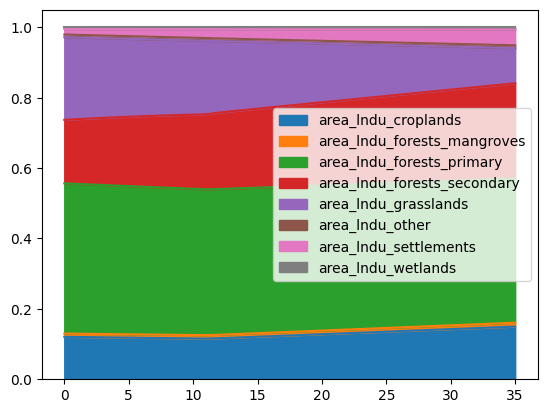

In [68]:
df_test = df_input[
    #df_out["strategy_id"].isin([1010])
    df_input["iso_code3"].isin(["BRA"])
]


#modvar = transformations_afolu.model_afolu.modvar_soil_demscalar_fertilizer
#modvar = transformations_afolu.model_afolu.modvar_soil_demscalar_liming
#modvar = transformations_afolu.model_afolu.modvar_lndu_factor_soil_management
#modvar = transformations_afolu.model_afolu.modvar_agrc_yf
#modvar = transformations_afolu.model_afolu.modvar_lvst_ef_ch4_ef
#modvar = transformations_afolu.model_afolu.modvar_lvst_carrying_capacity_scalar

importlib.reload(tba)

df_test_out, mats = tba.transformation_support_lndu_transition_to_category_targets_single_region(
    df_test,
    {
        "grasslands": 0.1,
        "croplands": 0.15
    },
    transformations_afolu.vec_implementation_ramp,
    sa.model_attributes,
    cats_stable = ["forests_primary", "settlements"],
    model_afolu = model_afolu
)


def check_fracs(df):
    df_in = df.copy()
    df_in["lndu_reallocation_factor"] = 0
    df_proj = model_afolu(df_in)
    df_out = sa.model_attributes.get_standard_variables(
        df_proj,
        model_afolu.modvar_lndu_area_by_cat
    )
    
    arr = np.array(df_out)
    fracs = sf.do_array_mult(arr, 1/arr.sum(axis = 1))
    
    df_ret = pd.DataFrame(fracs, columns = list(df_out.columns))
    
    return df_ret



check_fracs(df_test_out).plot.area()
check_fracs(df_test_out).tail()

<AxesSubplot: xlabel='time_period'>

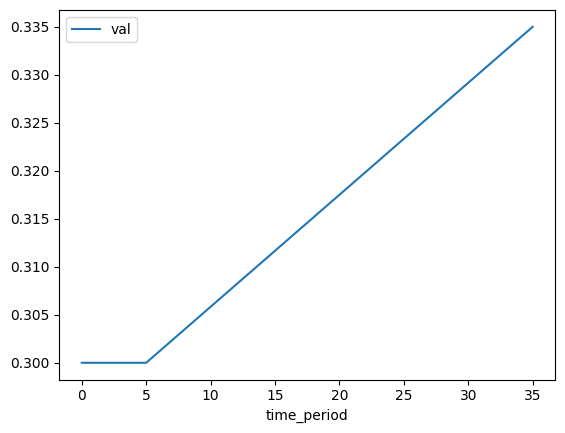

Signature:
df_tmp.interpolate(
    method: 'str' = 'linear',
    *,
    axis: 'Axis' = 0,
    limit: 'int | None' = None,
    inplace: 'bool' = False,
    limit_direction: 'str | None' = None,
    limit_area: 'str | None' = None,
    downcast: 'str | None' = None,
    **kwargs,
) -> 'DataFrame | None'
Docstring:
Fill NaN values using an interpolation method.

Please note that only ``method='linear'`` is supported for
DataFrame/Series with a MultiIndex.

Parameters
----------
method : str, default 'linear'
    Interpolation technique to use. One of:

    * 'linear': Ignore the index and treat the values as equally
      spaced. This is the only method supported on MultiIndexes.
    * 'time': Works on daily and higher resolution data to interpolate
      given length of interval.
    * 'index', 'values': use the actual numerical values of the index.
    * 'pad': Fill in NaNs using existing values.
    * 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline',
      'barycentric', 'p

In [131]:
df_tp = pd.DataFrame(
    {
        time_periods.field_time_period: time_periods.all_time_periods
    }
)
df_tmp = pd.DataFrame({
    time_periods.field_time_period: [0, 1, 2, 3, 4, 5, 35],
    #"val": [0.3, 0.31, 0.32, 0.3275, 0.3325, 0.335, 0.335]
    "val": [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.335]
})
df_tmp = pd.merge(df_tp, df_tmp, how = "left")
?df_tmp.interpolate
df_tmp.interpolate(method = "linear", order = 2).plot(x = "time_period")
#df_tmp.interpolate(method = "akima").plot(x = "time_period")

In [96]:
x = np.array([0.1, 0.4, 0.5])
q = np.array([
    [0.98, 0.02, 0.0],
    [0.01, 0.95, 0.04],
    [0.03, 0.0, 0.97]
])

np.dot(x, q)


array([0.117, 0.382, 0.501])

In [382]:
df_test_out[
    [
        x for x in df_test_out.columns
        if x.startswith("pij_lndu")
        and ("to_croplands" in x)
    ]
].tail()


,pij_lndu_croplands_to_croplands,pij_lndu_forests_mangroves_to_croplands,pij_lndu_forests_primary_to_croplands,pij_lndu_forests_secondary_to_croplands,pij_lndu_grasslands_to_croplands,pij_lndu_other_to_croplands,pij_lndu_settlements_to_croplands,pij_lndu_wetlands_to_croplands
31,0.969219,0.002208,0.000709,0.007888,0.018263,0.042331,0.000726,0.005901
32,0.969587,0.002209,0.000709,0.007891,0.018270,0.042348,0.000726,0.005903
33,0.969948,0.002210,0.000709,0.007894,0.018277,0.042363,0.000726,0.005905
34,0.970302,0.002211,0.000709,0.007897,0.018283,0.042379,0.000726,0.005907
35,0.961453,0.002190,0.000709,0.007825,0.018117,0.041992,0.000726,0.005853


In [335]:
df_test[
    [
        x for x in df_test.columns
        if x.startswith("pij_lndu")
        and ("to_croplands" in x)
    ]
].tail()


,pij_lndu_croplands_to_croplands,pij_lndu_forests_mangroves_to_croplands,pij_lndu_forests_primary_to_croplands,pij_lndu_forests_secondary_to_croplands,pij_lndu_grasslands_to_croplands,pij_lndu_other_to_croplands,pij_lndu_settlements_to_croplands,pij_lndu_wetlands_to_croplands
67,0.944196,0.002151,0.000709,0.007685,0.017792,0.041239,0.000726,0.005748
68,0.944196,0.002151,0.000709,0.007685,0.017792,0.041239,0.000726,0.005748
69,0.944196,0.002151,0.000709,0.007685,0.017792,0.041239,0.000726,0.005748
70,0.944196,0.002151,0.000709,0.007685,0.017792,0.041239,0.000726,0.005748
71,0.944196,0.002151,0.000709,0.007685,0.017792,0.041239,0.000726,0.005748


In [406]:
#df_out = transformations_circular_economy.build_strategies_long(strategies = [2015])
#df_out = transformations_ippu.build_strategies_long()

importlib.reload(mi)
model_ippu = mi.IPPU(sa.model_attributes)


In [302]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [280]:

def format_probs(
    cur_val: float, # input current transition probability
    targ_val: float, # input targeted (that would be otherwise flat)
    n: int,
) -> np.ndarray:

    vec = [
        sf.ramp_generic(
            x,
            n,
            1,
            0,
            np.e/1.85,
        )
        for x in range(n)
    ]
    vec = 1 + np.array(vec)
    
    prod_target = targ_val**n
    delta = targ_val - cur_val
    prod_projected = np.prod(delta*vec + cur_val)
    scale = (prod_target/prod_projected)**(1/n)
    
    vec_out = (delta*vec + cur_val)*scale
    
    return vec_out


format_probs(0.94, 0.96, 25)


array([0.95067852, 0.95075273, 0.95086076, 0.95101735, 0.95124292,
       0.95156495, 0.95201889, 0.95264737, 0.95349629, 0.95460545,
       0.9559933 , 0.95763892, 0.95947013, 0.96136934, 0.96320055,
       0.96484617, 0.96623402, 0.96734318, 0.9681921 , 0.96882059,
       0.96927452, 0.96959655, 0.96982212, 0.96997871, 0.97008674])

In [394]:
kk = sa.model_attributes.build_varlist(HEREHERE
    None,
    model_ippu.modvar_ippu_frac_captured_co2
)
for k in kk:
    print(k)

gasrf_ippu_co2_capture_cement
gasrf_ippu_co2_capture_chemicals
gasrf_ippu_co2_capture_glass
gasrf_ippu_co2_capture_lime_and_carbonite
gasrf_ippu_co2_capture_metals
gasrf_ippu_co2_capture_plastic


In [371]:
df_check = df_out[
    df_out["strategy_id"].isin([0, 4016])
    &  df_out["time_period"].isin([35])
    &  df_out["iso_code3"].isin(["BRA"])
]

fields_check = [x for x in df_check.columns if (x != "strategy_id")]
fields_diff = []
for k in fields_check:
    (
        fields_diff.append(k)
        if len(df_check[k].unique()) > 1
        else None
    )
df_check[fields_diff]

,demscalar_ippu_construction_and_demolition,demscalar_ippu_other_industries,demscalar_ippu_other_product_manufacturing,demscalar_ippu_product_use_lubricants,demscalar_ippu_product_use_ods_other,demscalar_ippu_product_use_ods_refrigeration,demscalar_ippu_product_use_other,demscalar_ippu_product_use_paraffin_wax,demscalar_ippu_wood,demscalar_ippu_cement,demscalar_ippu_chemicals,demscalar_ippu_electronics,demscalar_ippu_glass,demscalar_ippu_lime_and_carbonite,demscalar_ippu_metals,demscalar_ippu_mining,demscalar_ippu_paper,demscalar_ippu_plastic,demscalar_ippu_rubber_and_leather,demscalar_ippu_textiles
71,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4355,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7


In [402]:
import transformations_base_cross_sector as tbr
importlib.reload(tbg)
importlib.reload(tbr)
df_test = df_input[df_input["iso_code3"].isin(["BRA"])]
df_out = tbr.transformation_mlti_industrial_carbon_capture(
    df_test,
    0.8,
    #{
    #    "cement": 0.7,
    #    "chemicals": 0.8,
    #    "glass": 0.3
    #},
    transformations_ippu.vec_implementation_ramp,
    sa.model_attributes,
    model_ippu = transformations_ippu.model_ippu,
    #categories = ["cement", "chemicals", "thiog"],
    strategy_id = 5
)


sa.model_attributes.get_standard_variables(
    df_out,
    transformations_ippu.model_ippu.modvar_ippu_frac_captured_co2
)

,gasrf_ippu_co2_capture_cement,gasrf_ippu_co2_capture_chemicals,gasrf_ippu_co2_capture_glass,gasrf_ippu_co2_capture_lime_and_carbonite,gasrf_ippu_co2_capture_metals,gasrf_ippu_co2_capture_plastic
0,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000


In [332]:
#df_out = transformations_ippu.build_strategies_long()
#sa.model_attributes.get_variable_subsector("Population", throw_error_q = False)
#transformations_ippu.baseline_inputs
fields = sa.model_attributes.build_varlist(
    None,
    model_ippu.modvar_ippu_scalar_production
)
transformations_ippu.baseline_inputs[fields].drop_duplicates()


,demscalar_ippu_cement,demscalar_ippu_chemicals,demscalar_ippu_construction_and_demolition,demscalar_ippu_electronics,demscalar_ippu_glass,demscalar_ippu_lime_and_carbonite,demscalar_ippu_metals,demscalar_ippu_mining,demscalar_ippu_other_industries,demscalar_ippu_other_product_manufacturing,demscalar_ippu_paper,demscalar_ippu_plastic,demscalar_ippu_product_use_lubricants,demscalar_ippu_product_use_ods_other,demscalar_ippu_product_use_ods_refrigeration,demscalar_ippu_product_use_other,demscalar_ippu_product_use_paraffin_wax,demscalar_ippu_rubber_and_leather,demscalar_ippu_textiles,demscalar_ippu_wood
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
220,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [323]:
regions.field_iso# = sc.Regions(model)

'iso_alpha_3'

In [270]:
# IMPLEMENT AS TRANSFORMATIONS
fc = "pfc"



modvars = model_ippu.dict_fc_ef_modvars_by_type.get(fc)
fields = []
for modvar in modvars:
    fields += sa.model_attributes.build_varlist(
        None,
        modvar
    )
    
df_out[df_out["iso_code3"].isin(["BRA"])][fields]


,ef_ippu_tonne_c4f6_per_tonne_production_electronics,ef_ippu_tonne_c2f6_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c2f6_per_tonne_production_chemicals,ef_ippu_tonne_c2f6_per_tonne_production_electronics,ef_ippu_tonne_c2f6_per_tonne_production_metals,ef_ippu_tonne_cf4_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_cf4_per_tonne_production_chemicals,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_c5f8_per_tonne_production_electronics,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
36,2.000000e-06,6.185589e-06,0.0,3.074786e-09,9.876585e-08,0.0,0.0,0.0,1.362074e-06,0.0,3.883595e-09,0.000012,0.0,0.0,0.0,6.000000e-07,0.0,0.0
37,2.000000e-06,6.211567e-06,0.0,2.946965e-09,1.022759e-07,0.0,0.0,0.0,1.556534e-06,0.0,3.722153e-09,0.000012,0.0,0.0,0.0,6.000000e-07,0.0,0.0
38,2.000000e-06,6.237763e-06,0.0,2.385984e-09,8.574290e-08,0.0,0.0,0.0,1.304917e-06,0.0,3.013607e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0
39,2.000000e-06,6.264182e-06,0.0,2.847880e-09,7.902123e-08,0.0,0.0,0.0,1.202625e-06,0.0,3.597003e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0
40,2.000000e-06,6.411187e-06,0.0,2.915031e-09,7.661601e-08,0.0,0.0,0.0,1.166020e-06,0.0,3.687962e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0
41,2.000000e-06,6.438572e-06,0.0,3.443288e-09,1.043425e-07,0.0,0.0,0.0,1.587991e-06,0.0,4.356287e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0
42,2.000000e-06,6.400961e-06,0.0,2.945521e-09,9.303041e-08,0.0,0.0,0.0,1.396119e-06,0.0,3.724016e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0
43,2.000000e-06,6.400961e-06,0.0,2.945521e-09,9.303041e-08,0.0,0.0,0.0,1.396119e-06,0.0,3.724016e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0
44,2.000000e-06,6.400961e-06,0.0,2.945521e-09,9.303041e-08,0.0,0.0,0.0,1.396119e-06,0.0,3.724016e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0
45,2.000000e-06,6.400961e-06,0.0,2.945521e-09,9.303041e-08,0.0,0.0,0.0,1.396119e-06,0.0,3.724016e-09,0.000013,0.0,0.0,0.0,6.000000e-07,0.0,0.0


In [265]:
df_out

,strategy_id,iso_code3,nemomod_entc_residual_capacity_pp_biogas_gw,time_period,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,avgmass_lvst_animal_goats_kg,avgmass_lvst_animal_horses_kg,...,scalar_scoe_heat_energy_demand_commercial_municipal,scalar_scoe_heat_energy_demand_other_se,scalar_scoe_heat_energy_demand_residential,consumpinit_scoe_gj_per_hh_residential_elec_appliances,consumpinit_scoe_gj_per_hh_residential_heat_energy,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy,consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances,consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy,nation
0,4015,ARG,0,0,315,508,303,1.1,24,238,...,1.0,0.0,1.0,44.247099,2.328795,888.286285,46.751910,0.0,0.0,argentina
1,4015,ARG,0,1,315,508,303,1.1,24,238,...,1.0,0.0,1.0,45.734181,2.407062,941.929323,49.575228,0.0,0.0,argentina
2,4015,ARG,0,2,315,508,303,1.1,24,238,...,1.0,0.0,1.0,41.943454,2.207550,886.263871,46.645467,0.0,0.0,argentina
3,4015,ARG,0,3,315,508,303,1.1,24,238,...,1.0,0.0,1.0,41.069207,2.161537,890.320586,46.858978,0.0,0.0,argentina
4,4015,ARG,0,4,315,508,303,1.1,24,238,...,1.0,0.0,1.0,39.357286,2.071436,875.376264,46.072435,0.0,0.0,argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,4015,URY,0,31,315,508,303,1.1,24,238,...,1.0,1.0,1.0,28.555681,1.502931,623.037528,32.791449,0.0,0.0,uruguay
608,4015,URY,0,32,315,508,303,1.1,24,238,...,1.0,1.0,1.0,28.555681,1.502931,623.037528,32.791449,0.0,0.0,uruguay
609,4015,URY,0,33,315,508,303,1.1,24,238,...,1.0,1.0,1.0,28.555681,1.502931,623.037528,32.791449,0.0,0.0,uruguay
610,4015,URY,0,34,315,508,303,1.1,24,238,...,1.0,1.0,1.0,28.555681,1.502931,623.037528,32.791449,0.0,0.0,uruguay


In [234]:
df_test = df_input[
    df_input["iso_code3"].isin(["BRA"])
]
import transformations_base_ippu as tpi
importlib.reload(tpi)




In [237]:
model_ippu.dict_fc_ef_modvars_by_type

{'hfc': ['HFC-125 GDP Product Use Emission Factor',
  'HFC-125 Production Process Emission Factor',
  'HFC-134 GDP Product Use Emission Factor',
  'HFC-134a GDP Product Use Emission Factor',
  'HFC-134a Production Process Emission Factor',
  'HFC-143 GDP Product Use Emission Factor',
  'HFC-143a GDP Product Use Emission Factor',
  'HFC-143a Production Process Emission Factor',
  'HFC-152a GDP Product Use Emission Factor',
  'HFC-152a Production Process Emission Factor',
  'HFC-227ea GDP Product Use Emission Factor',
  'HFC-227ea Production Process Emission Factor',
  'HFC-23 GDP Product Use Emission Factor',
  'HFC-23 Production Process Emission Factor',
  'HFC-236fa GDP Product Use Emission Factor',
  'HFC-245fa GDP Product Use Emission Factor',
  'HFC-32 GDP Product Use Emission Factor',
  'HFC-32 Production Process Emission Factor',
  'HFC-365mfc GDP Product Use Emission Factor',
  'HFC-365mfc Production Process Emission Factor',
  'HFC-41 Production Process Emission Factor',
  'HFC

In [206]:
importlib.reload(ma)
importlib.reload(sa)
sa.model_attributes.dict_varreqs.get("partial_category_ip_ippu").table




In [ ]:
sa.model_attributes.dict_varreqs.get("partial_category_ip_ippu").table

,variable_type,variable,information,variable_schema,dashboard,categories,notes,data_link,reference,emission_factor,internal_model_variable,default_lhs_scalar_minimum_at_final_time_period,default_lhs_scalar_maximum_at_final_time_period,emissions_total_by_gas_component
0,Input,:math:\text{CH}_4 Production Process Emission ...,Unitless emission factor (tonne/tonne) represe...,``ef_ippu_$UNIT-MASS$_$EMISSION-GAS$_per_$UNIT...,NaN,``chemicals``|``metals``|``plastic``,NaN,NaN,NaN,1,0,1,1,0
1,Input,:math:\text{CO}_2 Clinker Production Process E...,Unitless emission factor (tonne/tonne) represe...,``ef_ippu_$UNIT-MASS$_$EMISSION-GAS$_per_$UNIT...,NaN,``cement``,NaN,NaN,NaN,1,0,1,1,0
2,Input,:math:\text{CO}_2 Product Use Emission Factor,Unitless carbon dioxide emission factor (tonne...,``ef_ippu_$UNIT-MASS$_$EMISSION-GAS$_per_$UNIT...,NaN,``product_use_lubricants``|``product_use_paraf...,NaN,NaN,NaN,1,0,1,1,0
3,Input,:math:\text{CO}_2 Production Process Emission ...,Unitless emission factor (tonne/tonne) represe...,``ef_ippu_$UNIT-MASS$_$EMISSION-GAS$_per_$UNIT...,NaN,``chemicals``|``glass``|``lime_and_carbonite``...,NaN,NaN,NaN,1,0,1,1,0
4,Input,:math:\text{N}_2\text{O} GDP Production Proces...,Unitless emission factor (tonne/tonne) represe...,``ef_ippu_$UNIT-MASS$_$EMISSION-GAS$_per_mmm_g...,NaN,``other_product_manufacturing``,NaN,NaN,NaN,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Output,PFC-31-10 Emissions from Industrial Production...,| Used in calibration to key industrial subsec...,``emission_co2e_$EMISSION-GAS$_ippu_production...,NaN,``chemicals``,NaN,NaN,NaN,0,0,1,1,1
110,Output,PFC-318 Emissions from Industrial Production P...,| Used in calibration to key industrial subsec...,``emission_co2e_$EMISSION-GAS$_ippu_production...,NaN,``chemicals``|``electronics``,NaN,NaN,NaN,0,1,1,1,1
111,Output,PFC-51-14 Emissions from Industrial Product Use,| Used in calibration to key industrial subsec...,``emission_co2e_$EMISSION-GAS$_ippu_product_us...,NaN,``product_use_ods_other``,NaN,NaN,NaN,0,1,1,1,1
112,Output,PFC-51-14 Emissions from Industrial Production...,| Used in calibration to key industrial subsec...,``emission_co2e_$EMISSION-GAS$_ippu_production...,NaN,``chemicals``,NaN,NaN,NaN,0,0,1,1,1


In [ ]:
importlib.reload(mi)
model_ippu = mi.IPPU(sa.model_attributes)

In [ ]:
sa.model_attributes.get_subsector_attribute(sa.model_attributes.subsec_name_ippu, "key_varreqs_partial")

'partial_category_ip_ippu'

In [ ]:
?sa.model_attributes._check_binary_fields

Signature:
sa.model_attributes._check_binary_fields(
    attr: attribute_table.AttributeTable,
    subsec: str,
    fields: str,
    force_sum_to_one: bool = False,
) -> None
Docstring:
Check fields `fields` in attr to ensure they are all binary (1 or 0). 
    Set `force_sum_to_one` = True to ensure that exactly one record 
    associated with each field is 1.
File:      ~/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py
Type:      method


In [ ]:
df_out = transformations_circular_economy.build_strategies_long()#(strategies = [0, 3003])

2023-05-28 17:43:49,519 - INFO - TransformationsCircularEconomy.build_strategies_long() starting build of 16 strategies...
2023-05-28 17:43:49,519 - INFO - TransformationsCircularEconomy.build_strategies_long() starting build of 16 strategies...
2023-05-28 17:43:50,012 - INFO - 	Successfully built transformation strategy_id = 2001 ('TRWW: All wastewater treatment transformations') in 0.49 seconds.
2023-05-28 17:43:50,012 - INFO - 	Successfully built transformation strategy_id = 2001 ('TRWW: All wastewater treatment transformations') in 0.49 seconds.


YEAH - 1354356


2023-05-28 17:43:50,547 - INFO - 	Successfully built transformation strategy_id = 2002 ('TRWW: Increase biogas capture') in 0.53 seconds.
2023-05-28 17:43:50,547 - INFO - 	Successfully built transformation strategy_id = 2002 ('TRWW: Increase biogas capture') in 0.53 seconds.


YEAH - 1354356


2023-05-28 17:43:50,789 - INFO - 	Successfully built transformation strategy_id = 2003 ('TRWW: Increase septic compliance') in 0.24 seconds.
2023-05-28 17:43:50,789 - INFO - 	Successfully built transformation strategy_id = 2003 ('TRWW: Increase septic compliance') in 0.24 seconds.


YEAH - 1354356


2023-05-28 17:43:51,635 - INFO - 	Successfully built transformation strategy_id = 2004 ('WALI: All transformations') in 0.84 seconds.
2023-05-28 17:43:51,635 - INFO - 	Successfully built transformation strategy_id = 2004 ('WALI: All transformations') in 0.84 seconds.


YEAH - 1354356


2023-05-28 17:43:51,940 - INFO - 	Successfully built transformation strategy_id = 2005 ('WALI: Improved industrial wastewater treatment') in 0.3 seconds.
2023-05-28 17:43:51,940 - INFO - 	Successfully built transformation strategy_id = 2005 ('WALI: Improved industrial wastewater treatment') in 0.3 seconds.


YEAH - 1354356


2023-05-28 17:43:52,218 - INFO - 	Successfully built transformation strategy_id = 2006 ('WALI: Improved rural wastewater treatment') in 0.28 seconds.
2023-05-28 17:43:52,218 - INFO - 	Successfully built transformation strategy_id = 2006 ('WALI: Improved rural wastewater treatment') in 0.28 seconds.


YEAH - 1354356


2023-05-28 17:43:52,502 - INFO - 	Successfully built transformation strategy_id = 2007 ('WALI: Improved urban wastewater treatment') in 0.28 seconds.
2023-05-28 17:43:52,502 - INFO - 	Successfully built transformation strategy_id = 2007 ('WALI: Improved urban wastewater treatment') in 0.28 seconds.


YEAH - 1354356


2023-05-28 17:43:54,820 - INFO - 	Successfully built transformation strategy_id = 2008 ('WASO: All solid waste') in 2.32 seconds.
2023-05-28 17:43:54,820 - INFO - 	Successfully built transformation strategy_id = 2008 ('WASO: All solid waste') in 2.32 seconds.


YEAH - 1354356


2023-05-28 17:43:55,055 - INFO - 	Successfully built transformation strategy_id = 2009 ('WASO: Biogas for energy production') in 0.23 seconds.
2023-05-28 17:43:55,055 - INFO - 	Successfully built transformation strategy_id = 2009 ('WASO: Biogas for energy production') in 0.23 seconds.


YEAH - 1354356


2023-05-28 17:43:55,291 - INFO - 	Successfully built transformation strategy_id = 2010 ('WASO: Incineration for energy production') in 0.23 seconds.
2023-05-28 17:43:55,291 - INFO - 	Successfully built transformation strategy_id = 2010 ('WASO: Incineration for energy production') in 0.23 seconds.


YEAH - 1354356


2023-05-28 17:43:55,757 - INFO - 	Successfully built transformation strategy_id = 2011 ('WASO: Increase biogas capture') in 0.46 seconds.
2023-05-28 17:43:55,757 - INFO - 	Successfully built transformation strategy_id = 2011 ('WASO: Increase biogas capture') in 0.46 seconds.


YEAH - 1354356


2023-05-28 17:43:56,051 - INFO - 	Successfully built transformation strategy_id = 2012 ('WASO: Increase composting and biogas') in 0.29 seconds.
2023-05-28 17:43:56,051 - INFO - 	Successfully built transformation strategy_id = 2012 ('WASO: Increase composting and biogas') in 0.29 seconds.


YEAH - 1354356


2023-05-28 17:43:56,278 - INFO - 	Successfully built transformation strategy_id = 2013 ('WASO: Increase landfilling') in 0.23 seconds.
2023-05-28 17:43:56,278 - INFO - 	Successfully built transformation strategy_id = 2013 ('WASO: Increase landfilling') in 0.23 seconds.


YEAH - 1354356


2023-05-28 17:43:56,545 - INFO - 	Successfully built transformation strategy_id = 2014 ('WASO: Increase recycling') in 0.27 seconds.
2023-05-28 17:43:56,545 - INFO - 	Successfully built transformation strategy_id = 2014 ('WASO: Increase recycling') in 0.27 seconds.


YEAH - 1354356


2023-05-28 17:43:57,052 - INFO - 	Successfully built transformation strategy_id = 2015 ('WASO: Waste reduction') in 0.51 seconds.
2023-05-28 17:43:57,052 - INFO - 	Successfully built transformation strategy_id = 2015 ('WASO: Waste reduction') in 0.51 seconds.


YEAH - 1354356


In [44]:

df_out = tbc.transformation_waso_increase_landfilling(
    df_input,
    1.0,
    transformations_circular_economy.vec_implementation_ramp,
    transformations_circular_economy.model_attributes,
    field_region = transformations_circular_economy.key_region,
    model_circecon = transformations_circular_economy.model_circecon,
    strategy_id = 0
)


sa.model_attributes.get_standard_variables(
    df_out,
    model_circecon.modvar_waso_frac_nonrecycled_landfill
).iloc[0:38]



,frac_waso_non_recycled_landfilled
0,0.600
1,0.600
2,0.600
3,0.600
4,0.600
5,0.600
6,0.600
7,0.600
8,0.600
9,0.600


In [ ]:
### importlib.reload(mc)
model_circecon = mc.CircularEconomy(sa.model_attributes)
#import transformations_base_general as tbg
importlib.reload(tbg)
importlib.reload(tbc)

df_out = tbc.transformation_trww_increase_gas_capture(
    df_input,
    {
        "treated_advanced_anaerobic": 0.85,
        "treated_secondary_anaerobic": 0.5,
    },
    transformations_circular_economy.vec_implementation_ramp,
    sa.model_attributes,
)

sa.model_attributes.get_standard_variables(
    df_out,
    model_circecon.modvar_trww_rf_biogas_recovered
).iloc[0:36]

#df_out[[x for x in df_out.columns if x.startswith("frac_wali_ww_industrial_treatment_path_")]].iloc[0:36]#.sum(axis = 1)

,gasrf_trww_biogas_treated_advanced_aerobic,gasrf_trww_biogas_treated_advanced_anaerobic,gasrf_trww_biogas_treated_secondary_aerobic,gasrf_trww_biogas_treated_secondary_anaerobic
0,0.0,0.000,0.0,0.00
1,0.0,0.000,0.0,0.00
2,0.0,0.000,0.0,0.00
3,0.0,0.000,0.0,0.00
4,0.0,0.000,0.0,0.00
5,0.0,0.000,0.0,0.00
6,0.0,0.000,0.0,0.00
7,0.0,0.000,0.0,0.00
8,0.0,0.000,0.0,0.00
9,0.0,0.000,0.0,0.00


In [ ]:
sa.model_attributes.assign_keys_from_attribute_fields(
    self.subsec_name_wali,
    "cat_"
)

NameError: name 'self' is not defined

In [76]:
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(dtc)

transformations_circular_economy = dtc.TransformationsCircularEconomy(
    sa.model_attributes,
    dict_config_te,
    df_input = df_input,
    field_region = "nation",
    logger = logger
)

df_tst = transformations_circular_economy.build_strategies_long()

In [70]:
model_circecon = mc.CircularEconomy(sa.model_attributes)
df_select = df_tst[
    df_tst["strategy_id"].isin([2013])
    & df_tst["iso_code3"].isin(["BRA"])
]

if True:
    df_print = sa.model_attributes.get_standard_variables(
        df_select,
        #model_circecon.modvar_waso_frac_landfill_gas_ch4_to_energy
        model_circecon.modvar_waso_frac_recovered_for_energy_incineration_isw
        #model_circecon.modvar_waso_frac_recycled
    )
else:
    df_print = df_select[
        [
            "frac_waso_non_recycled_landfilled", 
            "frac_waso_non_recycled_incinerated", 
            "frac_waso_non_recycled_open_dump"
        ]
    ]

df_print.tail()

In [ ]:
if True:
    fp_out = dict_template_file_paths.get("en").replace(".csv", "_with_transformations.csv")
    print(f"writing to output at {fp_out}...")
    df_out.to_csv(
        fp_out,
        index = None,
        encoding = "UTF-8"
    )

print("Done.")


In [ ]:
frac_shift_hh_elec = transformations_energy.frac_inen_low_temp_elec + transformations_energy.frac_inen_high_temp_elec_hydg
frac_shift_hh_elec /= transformations_energy.frac_inen_shift_denom

frac_shift_hh_hydrogen = transformations_energy.frac_inen_high_temp_elec_hydg
frac_shift_hh_hydrogen /= transformations_energy.frac_inen_shift_denom
frac_shift_hh_hydrogen, frac_shift_hh_elec




In [ ]:
importlib.reload(adt)
df_test = df_input[df_input["iso_code3"].isin(["BRA"])].reset_index(drop = True)
df_test_out_hi  = tbe.transformation_inen_shift_modvars(
    df_test,
    transformations_energy.frac_inen_shift_denom,
    transformations_energy.vec_implementation_ramp, 
    transformations_energy.model_attributes,
    categories = transformations_energy.cats_inen_high_heat,
    dict_modvar_specs = {
        transformations_energy.model_energy.modvar_inen_frac_en_electricity: frac_shift_hh_elec,
        transformations_energy.model_energy.modvar_inen_frac_en_hydrogen: frac_shift_hh_hydrogen,
    },
    field_region = transformations_energy.key_region,
    model_energy = transformations_energy.model_energy,
    strategy_id = 2
)


df_test_out_lo = tbe.transformation_inen_shift_modvars(
    df_test,
    transformations_energy.frac_inen_shift_denom,
    transformations_energy.vec_implementation_ramp, 
    transformations_energy.model_attributes,
    categories = transformations_energy.cats_inen_not_high_heat,
    dict_modvar_specs = {
        transformations_energy.model_energy.modvar_inen_frac_en_electricity: 1.0
    },
    field_region = transformations_energy.key_region,
    #magnitude_relative_to_baseline = True,
    model_energy = transformations_energy.model_energy,
    strategy_id = 2
)

In [ ]:
#attr_strat.table[attr_strat.table["strategy_id"].isin(range(3001, 3005))]
df_test_out_hi[[x for x in df_test_out.columns if x.startswith("frac_inen_energy_cement")]].iloc[[0, 1, 2, 33, 34, 35]]

In [ ]:
#attr_strat.table[attr_strat.table["strategy_id"].isin(range(3001, 3005))]
df_test_out_lo[[x for x in df_test_out.columns if x.startswith("frac_inen_energy_cement")]].iloc[[0, 1, 2, 33, 34, 35]]

In [ ]:
df_test_out_transf = transformations_energy.inen_all(df_test)
df_test_out_transf[[x for x in df_test_out_transf.columns if x.startswith("frac_inen_energy_cement")]].iloc[[0, 1, 2, 33, 34, 35]]

In [ ]:
trans_try = sc.Transformation(
    "INEN: All Industrial Energy transformations", 
    [
        transformations_energy.transformation_inen_fuel_switch_low_and_high_temp, # use instead of both functions to avoid incorrect results w/func composition
        #self.transformation_inen_maximize_efficiency_energy,
        #self.transformation_inen_maximize_efficiency_production
    ], 
    attr_strat
)

df_test_out_transf = trans_try(df_test)
df_test_out_transf[[x for x in df_test_out_transf.columns if x.startswith("frac_inen_energy_cement")]].iloc[[0, 1, 2, 33, 34, 35]]



df_test_out = transformations_energy.transformation_inen_fuel_switch_low_and_high_temp(
    df_test,
    strat = 2
)
df_test_out[[x for x in df_test_out.columns if x.startswith("frac_inen_energy_cement")]].iloc[[0, 1, 2, 33, 34, 35]]

In [ ]:
attr_inds = sa.model_attributes.get_attribute_table(sa.model_attributes.subsec_name_ippu)
sub = set(transformations_energy.cats_inen_not_high_heat)
len(sub & set(attr_inds.key_values)) - len(sub)

In [ ]:
importlib.reload(mc)
model_circecon = mc.CircularEconomy(sa.model_attributes)
importlib.reload(adt)

"""
sa.model_attributes.get_standard_variables(
    t,
    model_circecon.modvar_waso_waste_per_capita_scalar,
)
"""


t2 = 
sa.model_attributes.get_standard_variables(
    t2,
    model_circecon.modvar_waso_frac_nonrecycled_incineration,
)

t2[["frac_waso_non_recycled_landfilled", "frac_waso_non_recycled_open_dump", "frac_waso_non_recycled_incinerated"]]

In [ ]:
model_circecon.modvars_waso_frac_non_recyled_pathways

In [74]:
?tbe.transformation_general_shift_fractions_from_modvars

In [ ]:
df_test = df_input[df_input["iso_code3"].isin(["BRA"])]
tbe.transformation_general_shift_fractions_from_modvars(
    df_test, 
    0.5,
    
)

In [ ]:
dict_a = {"this": 0.5}

x = dict_a.get("this")

x *= 4

dict_a

In [ ]:
arr = np.ones((6, 3))
arr[:,2] = 1.5

arr[5, 1] = 1.2
arr


sf.vec_bounds(arr, (0, 1.4))

In [ ]:
sf.vec_bounds(
    
)